**데이터 설명**

- id : 탑승자 고유 아이디
- gender: 성별 (Female, Male)
- customer_type: 고객 유형 (Loyal customer, disloyal customer)
- age: 탑승자 나이
- type_of_travel: 비행 목적(Personal Travel, Business Travel)
- class: 등급 (Business, Eco, Eco Plus)
- flight_distance: 비행 거리
- inflight_wifi_service: 와이파이 서비스 만족도 (0:N/A; 1-5)
- departure/arrival_time_convenient: 출발, 도착 시간 만족도 (0:N/A; 1-5)
- ease_of_online_booking: 온라인 부킹 만족도 (0:N/A; 1-5)
- gate_location: 게이트 위치 만족도 (0:N/A; 1-5)
- food_and_drink: 식사와 음료 만족도 (0:N/A; 1-5)
- online_boarding: 온라인 보딩 만족도 (0:N/A; 1-5)
- seat_comfort: 좌석 편안함 만족도 (0:N/A; 1-5)
- inflight_entertainment: 기내 엔터테인먼트 만족도 (0:N/A; 1-5)
- on-board_service: 온 보드 서비스 만족도 (0:N/A; 1-5)
- leg_room_service: 다리 공간 만족도 (0:N/A; 1-5)
- baggage_handling: 수하물 처리 만족도 (0:N/A; 1-5)
- check-in_service: 체크인 서비스 만족도 (0:N/A; 1-5)
- inflight_service: 기내 서비스 만족도 (0:N/A; 1-5)
- cleanliness: 청결 만족도 (0:N/A; 1-5)
- departure_delay_in_minutes: 출발 지연 시간(분)
- arrival_delay_in_minutes: 도착 지연 시간(분)
- satisfaction: 항공 만족도(1: Satisfaction, 0: Neutral or Dissatisfaction) - Target

### 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### 데이터 불러오기

In [3]:
path = 'https://raw.githubusercontent.com/jangrae/csv/master/airline_satisfaction_small.csv'
data = pd.read_csv(path)

### 데이터 이해 및 분석

In [7]:
data.head(3)

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1


In [6]:
data.tail(3)

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
2577,49355,Male,Loyal Customer,41,Business travel,Business,3306,5,5,5,...,5,5,5,5,2,5,2,28,24.0,1
2578,46728,Female,Loyal Customer,17,Personal Travel,Eco,125,3,2,0,...,5,4,4,3,3,3,5,0,0.0,0
2579,34516,Female,Loyal Customer,36,Personal Travel,Eco,1521,2,2,2,...,5,3,4,3,3,3,5,0,4.0,0


In [8]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 2580 non-null   int64  
 1   gender                             2580 non-null   object 
 2   customer_type                      2580 non-null   object 
 3   age                                2580 non-null   int64  
 4   type_of_travel                     2580 non-null   object 
 5   class                              2580 non-null   object 
 6   flight_distance                    2580 non-null   int64  
 7   inflight_wifi_service              2580 non-null   int64  
 8   departure/arrival_time_convenient  2580 non-null   int64  
 9   ease_of_online_booking             2580 non-null   int64  
 10  gate_location                      2580 non-null   int64  
 11  food_and_drink                     2580 non-null   int64

In [10]:
# 통계치 확인
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2580.0,65179.742248,37320.994433,54.0,32988.75,64877.0,97717.0,129860.0
age,2580.0,39.229845,15.295065,7.0,26.00,40.0,51.0,85.0
flight_distance,2580.0,1204.824806,1008.852185,67.0,405.75,860.0,1754.5,4963.0
inflight_wifi_service,2580.0,2.732558,1.317032,0.0,2.00,3.0,4.0,5.0
departure/arrival_time_convenient,2580.0,3.041473,1.542290,0.0,2.00,3.0,4.0,5.0
ease_of_online_booking,2580.0,2.758527,1.400792,0.0,2.00,3.0,4.0,5.0
gate_location,2580.0,2.973256,1.271752,1.0,2.00,3.0,4.0,5.0
food_and_drink,2580.0,3.229457,1.341635,0.0,2.00,3.0,4.0,5.0
online_boarding,2580.0,3.242248,1.341842,0.0,2.00,3.0,4.0,5.0
seat_comfort,2580.0,3.440310,1.329681,1.0,2.00,4.0,5.0,5.0


### 데이터 전처리 및 준비

In [11]:
# 필요없는 변수 제거
drop_cols = ['id', 'departure/arrival_time_convenient', 'gate_location', 'departure_delay_in_minutes']
data = data.drop(drop_cols, axis=1)
list(data)

['gender',
 'customer_type',
 'age',
 'type_of_travel',
 'class',
 'flight_distance',
 'inflight_wifi_service',
 'ease_of_online_booking',
 'food_and_drink',
 'online_boarding',
 'seat_comfort',
 'inflight_entertainment',
 'on-board_service',
 'leg_room_service',
 'baggage_handling',
 'checkin_service',
 'inflight_service',
 'cleanliness',
 'arrival_delay_in_minutes',
 'satisfaction']

In [13]:
help(pd.Series.fillna)

Help on function fillna in module pandas.core.series:

fillna(self, value: 'Hashable | Mapping | Series | DataFrame' = None, *, method: 'FillnaOptions | None' = None, axis: 'Axis | None' = None, inplace: 'bool' = False, limit: 'int | None' = None, downcast: 'dict | None' = None) -> 'Series | None'
    Fill NA/NaN values using the specified method.
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame).  Values not
        in the dict/Series/DataFrame will not be filled. This value cannot
        be a list.
    method : {'backfill', 'bfill', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series:
    
        * ffill: propagate last valid observation forward to next valid.
        * backfill / bfill: use next valid observation to fill 

In [18]:
# 결측치, 이상치 처리 -> 결측치 평균으로 넣기
col = 'arrival_delay_in_minutes'
data[col] = data[col].fillna(data[col].mean())

In [23]:
# target 변수 분리
target = 'satisfaction'

X = data.drop(target, axis=1)
y = data.loc[:,target]

In [25]:
# 가변수화
dumm_cols = ['gender','customer_type','type_of_travel','class']
X = pd.get_dummies(X, columns=dumm_cols, drop_first=True, dtype=int)

In [26]:
# 훈련, 테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
# 정규화 for KNN
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 시각화 및 추가 분석

<Axes: >

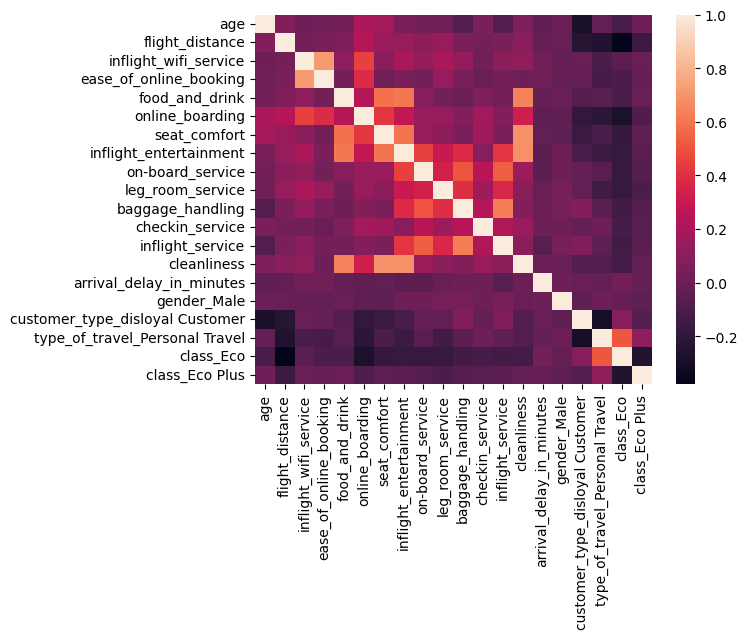

In [35]:
sns.heatmap(X.corr())

### 모델 라이브러리 불러오기

### 모델 검증

### 모델 튜닝

### 평가